In [15]:
# Importing the libraries
import sys
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.ensemble import AdaBoostClassifier

# To ignore warnings
import warnings
warnings.filterwarnings ("ignore")


## Importing Data

In [16]:
file_path=r"C:\Users\sanch\Desktop\Creditcard_Frauddetection\creditcard.csv"
df= pd.read_csv(file_path)

## Exploratory Data Analysis

In [17]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [18]:
df.shape

(284807, 31)

In [19]:
df.info

<bound method DataFrame.info of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  

In [20]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [21]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


<Axes: ylabel='Class'>

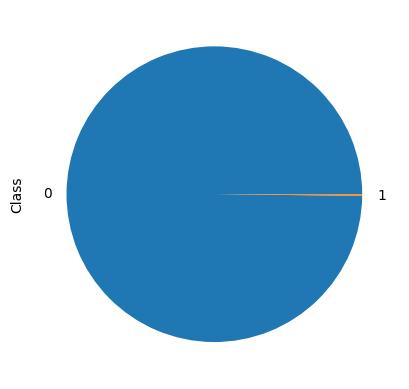

In [22]:
# Checking the class distribution of the target variable in percentage
print((df.groupby('Class')[ 'Class'].count()/df['Class'].count()) *100)
((df.groupby( 'Class')[ 'Class'].count()/df['Class'].count()) *100).plot.pie()

In [23]:
# Checking the % distribution of normal vs fraud
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print (normal_share) 
print (fraud_share)

99.82725143693798
0.1727485630620034


In [24]:
corr=df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


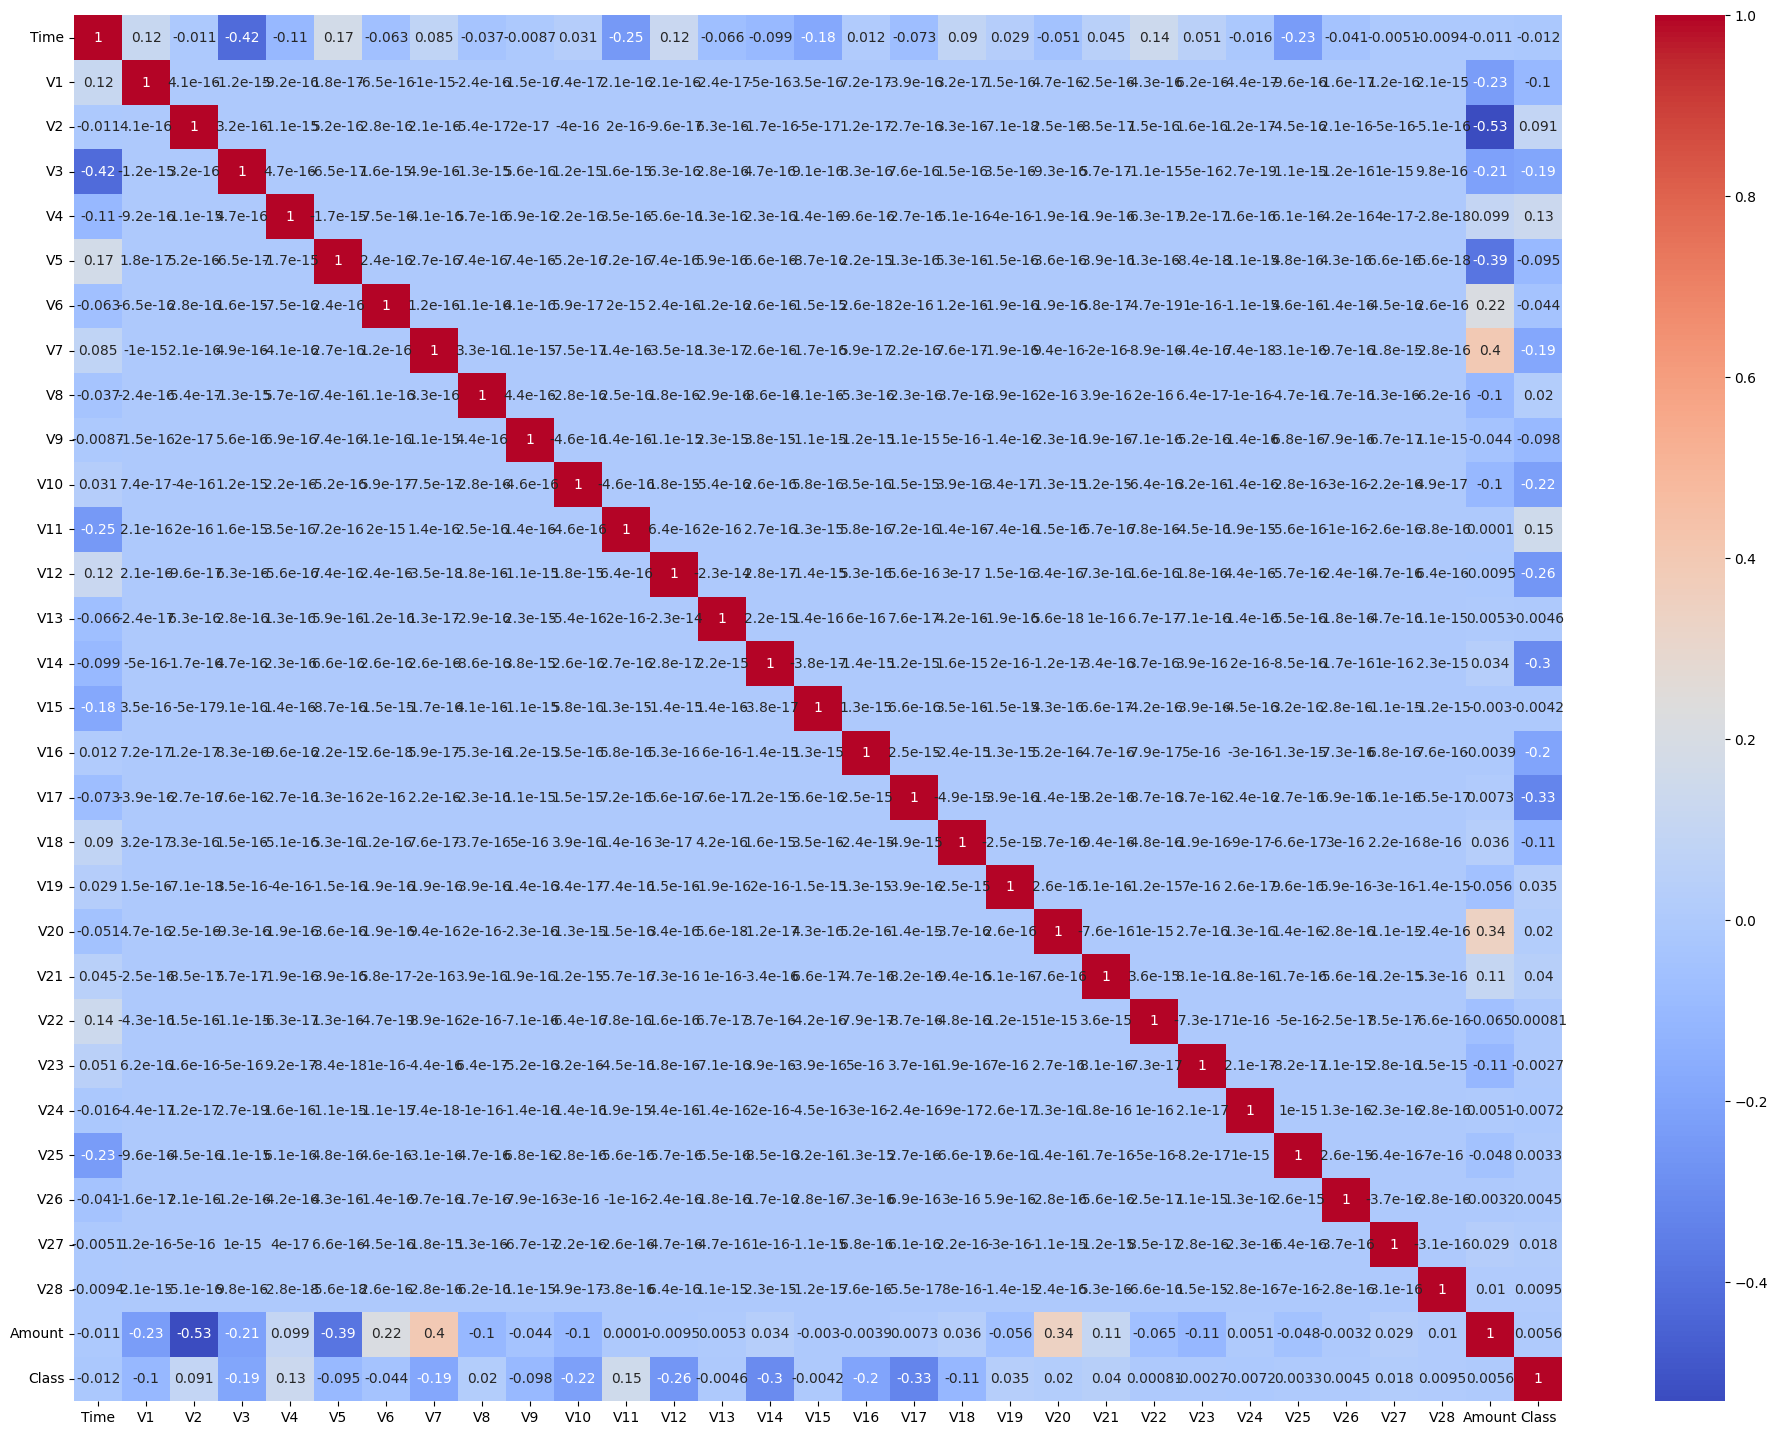

In [25]:
plt.figure(figsize=(24,18))

sns.heatmap(corr,cmap="coolwarm",annot=True)
plt.show()

In [26]:
# As time is given in relative fashion, we are using pandas. Timedelta which Represents a duration, the difference betweentwo timeframes
Delta_Time = pd.to_timedelta(df['Time'],unit='s')

#Create derived columns Mins and hours
df['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df['Time_Hour']= (Delta_Time.dt.components. hours).astype(int)
df ['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)


In [27]:
# Drop unnecessary columns
# We will drop Time, as we have derived the Day/Hour/Minutes from the time column
df.drop('Time', axis = 1, inplace= True)
# We will keep only derived column hour, as day/minutes might not be very useful
df.drop(['Time_Day', 'Time_Min'], axis = 1, inplace= True)

## Splitting the data into train & test data

In [28]:
y=df["Class"]
X=df.drop(["Class"],axis=1)

In [29]:
#checking some rows of x
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [30]:
#Checking some rows of y
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [31]:
#Splitting the dateset using train test split 
X_train, X_test, y_train,y_test=train_test_split(X,y,random_state=100,test_size=0.20)

In [32]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


### Plotting the distribution of a variable


In [33]:
cols= list(X.columns.values)

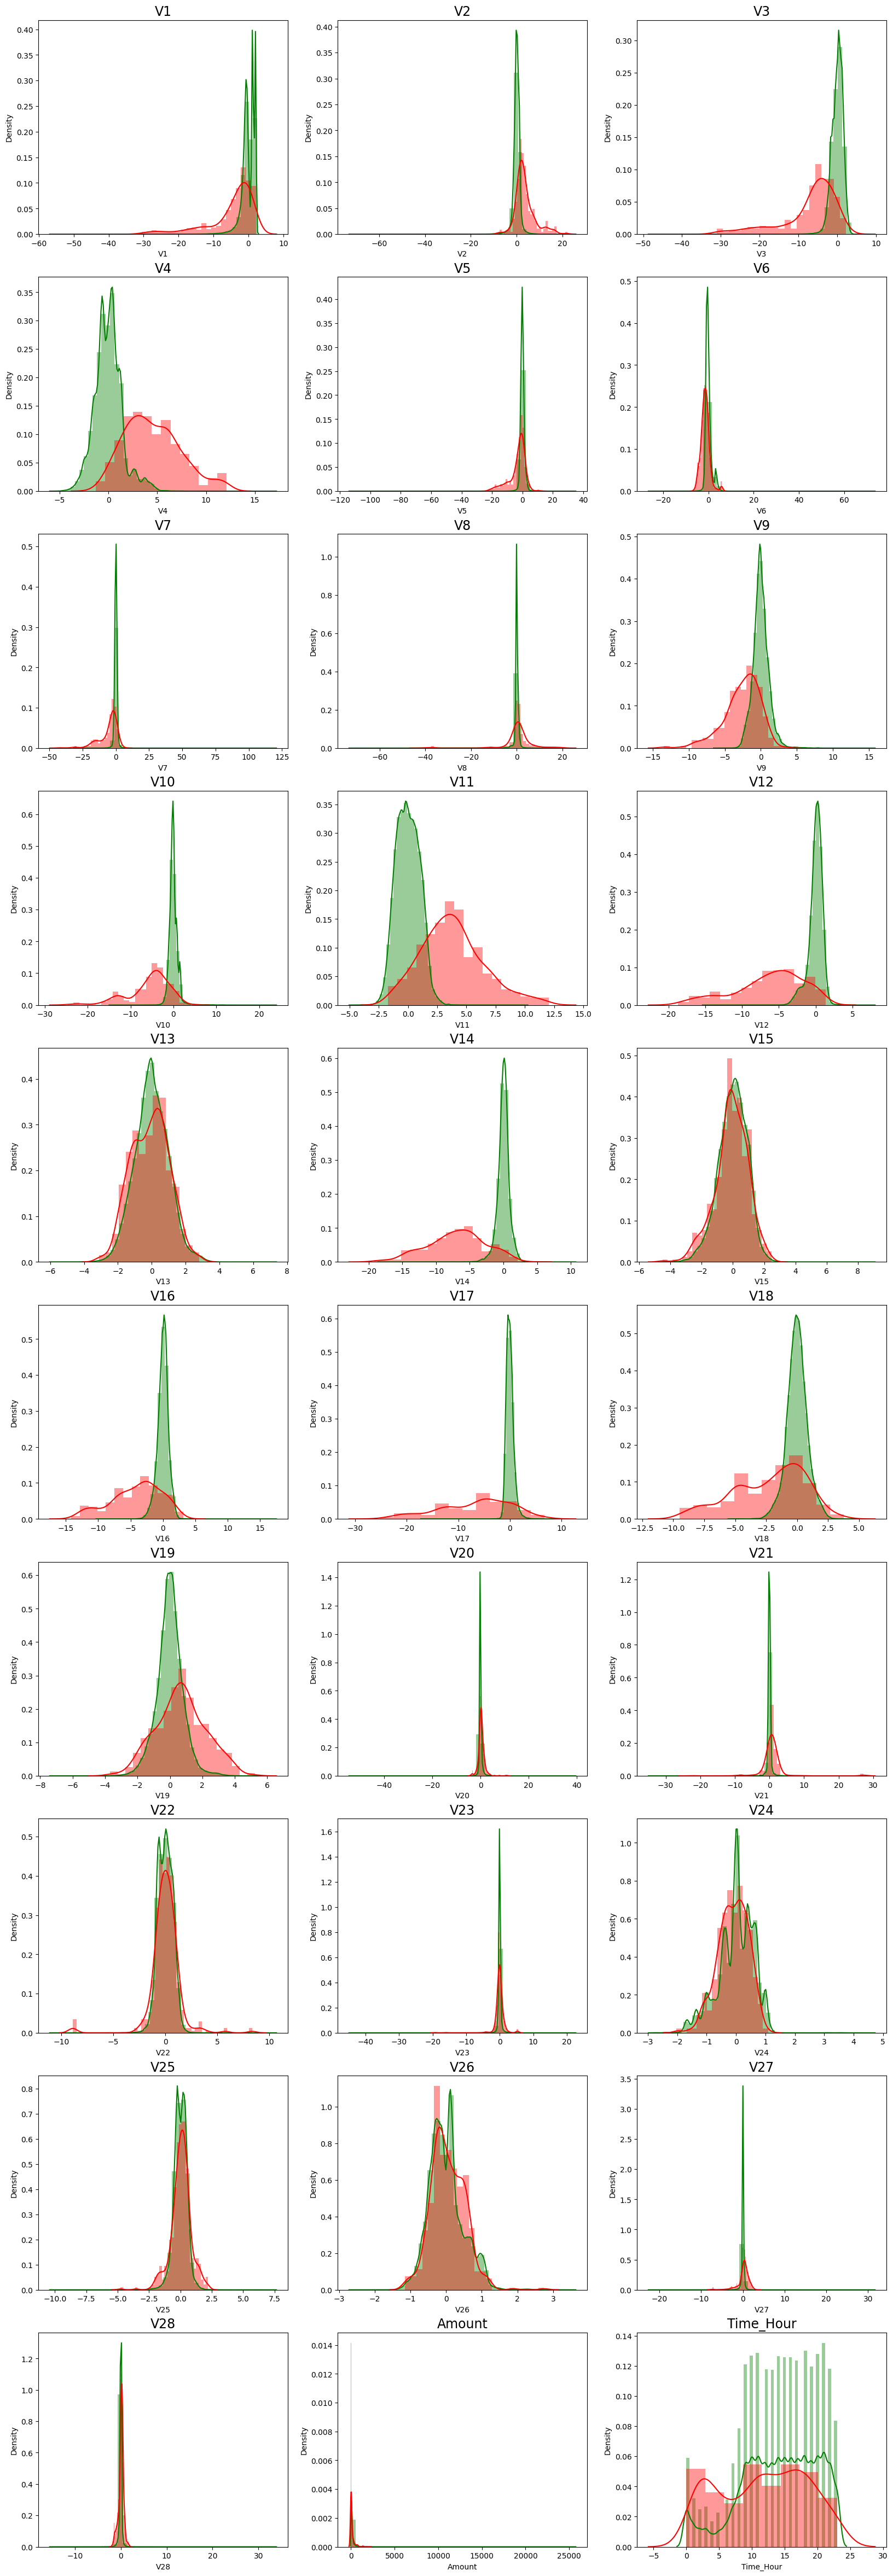

In [34]:
#Plotting histogram of a variable from the dataset to see the skewness
normal_records=df.Class==0
fraud_records=df.Class==1

plt.figure(figsize=(20,60))
for n,col in enumerate(cols):
    plt.subplot(10,3,n+1)
    sns.distplot(X[col][normal_records],color="green")
    sns.distplot(X[col][fraud_records],color="red")
    plt.title(col,fontsize=17)
plt.show()

# Model Building

In [35]:
#Create a dataframe to store results
df_Results = pd.DataFrame (columns=['Methodology', 'Model', 'Accuracy', 'roc_value', 'threshold'])

# Created a common function to plot confusion matrix
def Plot_confusion_matrix(y_test,pred_test):
    cm = confusion_matrix(y_test, pred_test)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
    categoryNames = ['Non-Fraudalent', 'Fraudalent']
    plt.title('Confusion Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ticks = np.arange(len(categoryNames))
    plt.xticks(ticks, categoryNames, rotation=45)
    plt.yticks(ticks, categoryNames)
    s = [['TN', 'FP'], ['FN', 'TP']]
    
    for i in range (2):
        for j in range (2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
    plt.show()

In [36]:
# # Created a common function to fit and predict on a Logistic Regression model for both L1 and L2
def buildAndRunLogisticModels (df_Results, Methodology, X_train,y_train, X_test, y_test):

    # Logistic Regression
    from sklearn import linear_model
    from sklearn.model_selection import KFold

    num_C= list(np.power (10.0, np.arange(-10, 10)))
    cv_num= KFold(n_splits=10, shuffle=True, random_state=42)

    searchCV_l2= linear_model.LogisticRegressionCV(
        Cs= num_C
        ,penalty='l2'
        ,scoring='roc_auc'
        ,cv=cv_num
        ,random_state=42
        ,max_iter=10000
        ,fit_intercept=True
        ,solver='newton-cg'
        ,tol=10
    )
    
    searchCV_l1 = linear_model.LogisticRegressionCV(
        Cs=num_C
        ,penalty='l1'
        ,scoring='roc_auc'
        ,cv=cv_num
        ,random_state=42
        ,max_iter=10000
        ,fit_intercept=True
        ,solver='liblinear'
        ,tol=10
    )

    searchCV_l1.fit(X_train, y_train) 
    searchCV_l2.fit(X_train, y_train)
    #print('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max()) 
    #print('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())

    print("Parameters for l1 regularisations")
    print(searchCV_l1.coef_)
    print (searchCV_l1.intercept_)
    print(searchCV_l1.scores_)
    
    print("Parameters for l2 regularisations")
    print(searchCV_l2.coef_)
    print(searchCV_l2.intercept_) 
    print(searchCV_l2.scores_)

#find predicted vallues
    y_pred_l1 = searchCV_l1.predict(X_test)
    y_pred_l2 = searchCV_l2.predict(X_test)
    
#Find predicted probabilities
    y_pred_probs_l1 = searchCV_l1.predict_proba(X_test)[:,1]
    y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1]

# Accuaracy of L2/L1 models
    Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
    Accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)

    print("Accuarcy of Logistic model with 12 regularisation : {0}".format(Accuracy_l2))
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred_l2)
    print("classification Report")
    print(classification_report(y_test, y_pred_l2))
    
    print("Accuarcy of Logistic model with l1 regularisation: {0}".format(Accuracy_l1)) 
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred_l1) 
    print("classification Report")
    print(classification_report(y_test, y_pred_l1))

    l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2) 
    print("l2 roc_value: {0}".format(l2_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("l2 threshold: {0}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    df_Results = pd.concat([df_Results,pd.DataFrame({ 'Methodology': Methodology, 'Model': 'Logistic Regression with L2 Regularisation','Accuracy': Accuracy_l2,'roc_value':l2_roc_value,'threshold':threshold},index=[0])],ignore_index=True)

    l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
    print("l1 roc_value: {0}".format(l1_roc_value))
    fpr, tpr, thresholds= metrics.roc_curve(y_test, y_pred_probs_l1) 
    threshold=thresholds[np.argmax(tpr-fpr)]
    print("l1 threshold: {0}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    df_Results = pd.concat([df_Results,pd.DataFrame({ 'Methodology': Methodology, 'Model': 'Logistic Regression with L1 Regularisation','Accuracy': Accuracy_l1,'roc_value':l1_roc_value,'threshold':threshold},index=[0])],ignore_index=True)

    return df_Results
    

In [37]:
# Created a common function to fit and predict on a KNN model
def buildAndRunKNNModels(df_Results, Methodology, X_train,y_train, X_test, y_test ):
    
    #create KNN model and fit the model with train dataset
    knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
    knn.fit(X_train,y_train)
    score= knn.score(X_test,y_test) 
    print("model score")
    print(score)
    
    #Accuracy
    y_pred = knn.predict(X_test)
    KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred)
    print("classification Report")
    print(classification_report(y_test, y_pred))
    
    knn_probs = knn.predict_proba(X_test)[:, 1]
    
    # Calculate roc auc
    knn_roc_value = roc_auc_score(y_test, knn_probs)
    print("KNN roc_value: {0}".format(knn_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
    threshold =thresholds[np.argmax(tpr-fpr)]
    print("KNN threshold: {0}".format(threshold))
    
    roc_auc=metrics.auc(fpr,tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    
    df_Results= pd.concat([df_Results,pd.DataFrame({'Methodology': Methodology, 'Model': 'KNN','Accuracy': score,'roc_value':knn_roc_value,'threshold':threshold},index=[0])],ignore_index=True)
    return df_Results

In [38]:

# Created a common function to fit and predict on a Tree models for both gini and entropy criteria
def buildAndRunTreeModels(df_Results, Methodology, X_train,y_train, X_test, y_test):
    #Evaluate Decision Tree model with 'gini' & 'entropy'
    criteria=['gini', 'entropy']
    scores= {}

    for c in criteria:
        dt = DecisionTreeClassifier(criterion = c, random_state=42)
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        test_score = dt.score (X_test, y_test)
        tree_preds = dt.predict_proba(X_test)[:, 1]
        tree_roc_value = roc_auc_score(y_test, tree_preds)
        scores = test_score
        print(c+" score: {0}".format(test_score))
        print("Confusion Matrix")
        Plot_confusion_matrix(y_test, y_pred)
        print("classification Report")
        print(classification_report(y_test, y_pred))
        print(c+ "tree_roc_value: {0}".format(tree_roc_value))
        fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
        threshold =thresholds[np.argmax(tpr-fpr)]
        print("Tree threshold: {0}".format(threshold))
        roc_auc = metrics.auc(fpr, tpr)
        print("ROC for the test dataset", '{:.1%}'.format(roc_auc))
        plt.plot(fpr, tpr,label="Test, auc="+str(roc_auc))
        plt.legend(loc=4)
        plt.show()
    
        df_Results= pd.concat([df_Results,pd.DataFrame({'Methodology': Methodology, 'Model': 'Tree Model with {0} criteria'.format(c),'Accuracy': test_score,'roc_value':tree_roc_value,'threshold':threshold},index=[0])],ignore_index=True)

    return df_Results

In [39]:
# Created a common function to fit and predict on a Random Forest model
def buildAndRunRandomForestModels (df_Results, Methodology, X_train,y_train, X_test, y_test ):
    #Evaluate Random Forest model
    # Create the model with 100 trees
    RF_model = RandomForestClassifier(n_estimators=100,bootstrap= True,max_features = 'sqrt', random_state=42)
    # Fit on training data
    RF_model.fit(X_train, y_train)
    RF_test_score = RF_model.score (X_test, y_test)
    RF_model.predict(X_test)
    
    print('Model Accuracy: {0}'.format(RF_test_score))
    
    
    # Actual class predictions
    rf_predictions = RF_model.predict(X_test)
    
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, rf_predictions)
    print("classification Report")
    print(classification_report(y_test, rf_predictions))
    
    # Probabilities for each class
    rf_probs = RF_model.predict_proba(X_test)[:, 1]
    
    #Calculate the roc value
    roc_value = roc_auc_score(y_test, rf_probs)
    
    print("Random Forest roc_value: {0}".format(roc_value))
    fpr, tpr, thresholds = metrics.roc_curve (y_test, rf_probs) 
    threshold =thresholds[np.argmax(tpr-fpr)]
    
    print("Random Forest threshold: {0}".format(threshold)) 
    roc_auc =metrics.auc(fpr, tpr)
    print("ROC for the test dataset", '{:.1%}'.format(roc_auc))
    plt.plot(fpr, tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    
    df_Results = pd.concat([df_Results,pd.DataFrame({ 'Methodology': Methodology, 'Model': 'Random Forest', 'Accuracy': RF_test_score,'roc_value':roc_value,'threshold':threshold},index=[0])],ignore_index=True)
                                                 
    return df_Results

    

In [40]:
# Created a common function to fit and predict on a XGBoost model
def buildAndRunXGBoostModels (df_Results, Methodology, X_train,y_train, X_test, y_test ):
    #Evaluate XGboost model
    XGBmodel = XGBClassifier(random_state=42)
    XGBmodel.fit(X_train, y_train)
    y_pred = XGBmodel.predict(X_test)
    
    XGB_test_score = XGBmodel.score (X_test, y_test)
    print('Model Accuracy: {0}'.format(XGB_test_score))
    
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred) 
    
    print("classification Report")
    print(classification_report(y_test, y_pred))
    
    # Probabilities for each class
    XGB_probs = XGBmodel.predict_proba(X_test) [:, 1]
    
    #Calculate roc auc
    XGB_roc_value = roc_auc_score(y_test, XGB_probs)
    
    print("XGboost roc_value: {0}".format(XGB_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve (y_test, XGB_probs) 
    threshold = thresholds[np.argmax (tpr-fpr)]
    print("XGBoost threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    
    df_Results = pd.concat([df_Results,pd.DataFrame({ 'Methodology': Methodology, 'Model': 'XGBoost', 'Accuracy': XGB_test_score,'roc_value':XGB_roc_value,'threshold': threshold},index=[0])],ignore_index=True)
    return df_Results

In [41]:
# Created a common function to fit and predict on a SVM model
def buildAndRunSVMModels(df_Results, Methodology, X_train,y_train, X_test, y_test): 
    #Evaluate SVM model with sigmoid kernel model
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score 
    from sklearn.metrics import roc_auc_score
    
    clf =SVC(kernel='sigmoid', random_state=42)
    clf.fit(X_train,y_train)
    y_pred_SVM =clf.predict(X_test)
    SVM_Score= accuracy_score(y_test,y_pred_SVM)
    print("accuracy_score: {0}".format (SVM_Score))
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred_SVM)
    print("classification Report")
    print(classification_report(y_test, y_pred_SVM))
    
    # Run classifier
    classifier = SVC(kernel='sigmoid', probability=True)
    svm_probs = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]
    
    # Calculate roc auc
    roc_value = roc_auc_score(y_test, svm_probs)
    
    print("SVM roc_value: {0}".format(roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_probs)
    threshold =thresholds[np.argmax(tpr-fpr)]
    print("SVM threshold: {0}".format(threshold))
    roc_auc =metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    
    df_Results=pd.concat([df_Results,pd.DataFrame({ 'Methodology': Methodology, 'Model': 'SVM', 'Accuracy': SVM_Score, 'roc_value':roc_value,'threshold': threshold},index=[0])],ignore_index=True)
    return df_Results

## Perform cross validation with RepeatedKFOLD

In [42]:
#Lets perfrom RepeatedKFold and check the results 
from sklearn.model_selection import RepeatedKFold
rkf= RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)

#X is the feature set and y is the target
for train_index, test_index in rkf.split(X,y):
    print("TRAIN: ", train_index, "TEST: ", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN:  [     1      2      3 ... 284804 284805 284806] TEST:  [     0     11     16 ... 284789 284798 284803]
TRAIN:  [     0      1      6 ... 284802 284803 284805] TEST:  [     2      3      4 ... 284801 284804 284806]
TRAIN:  [     0      1      2 ... 284804 284805 284806] TEST:  [    17     29     31 ... 284793 284796 284800]
TRAIN:  [     0      1      2 ... 284804 284805 284806] TEST:  [     6      9     12 ... 284787 284790 284802]
TRAIN:  [     0      2      3 ... 284803 284804 284806] TEST:  [     1      7     10 ... 284794 284795 284805]
TRAIN:  [     0      1      2 ... 284804 284805 284806] TEST:  [     6      7     13 ... 284782 284787 284796]
TRAIN:  [     0      2      4 ... 284804 284805 284806] TEST:  [     1      3     14 ... 284786 284790 284797]
TRAIN:  [     0      1      3 ... 284802 284805 284806] TEST:  [     2      5      8 ... 284800 284803 284804]
TRAIN:  [     1      2      3 ... 284804 284805 284806] TEST:  [     0      9     11 ... 284795 284798 284801]
T

Logistic Regression with L1 And L2 Regularisation
Parameters for l1 regularisations
[[-0.05589238 -0.13381761 -0.17476233  0.0650121  -0.26373373  0.09386832
   0.12411659 -0.03491069 -0.14299501 -0.14206233 -0.03950444  0.01192724
  -0.14064569 -0.21828101  0.01373491 -0.11718182 -0.21583378  0.03648845
   0.01423314  0.24381035  0.09424087 -0.02459519  0.01279151 -0.01974518
  -0.02249613  0.00459473 -0.07690114  0.00424565 -0.0068795  -0.1161506 ]]
[-2.08726617]
{1: array([[0.5       , 0.5       , 0.5       , 0.5       , 0.46719214,
        0.44106949, 0.50645716, 0.96126826, 0.97932726, 0.98590049,
        0.96904099, 0.97514076, 0.9915769 , 0.98747528, 0.98471019,
        0.99287866, 0.97769111, 0.99018924, 0.95153215, 0.9970989 ],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.51288791,
        0.5630675 , 0.59472214, 0.92141538, 0.9750292 , 0.97998242,
        0.97216452, 0.97503171, 0.98240251, 0.97847535, 0.9813978 ,
        0.9870719 , 0.97211931, 0.98070078, 0.958

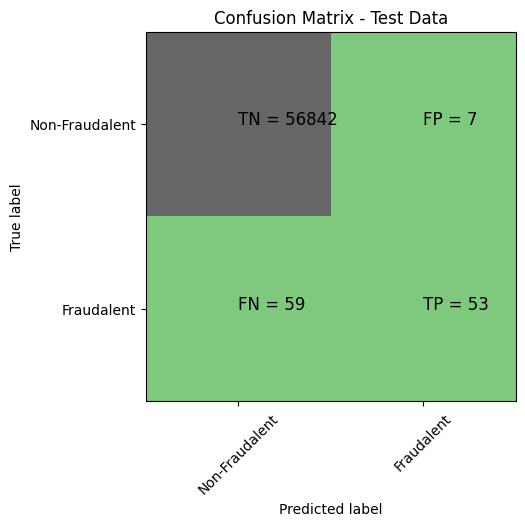

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56849
           1       0.88      0.47      0.62       112

    accuracy                           1.00     56961
   macro avg       0.94      0.74      0.81     56961
weighted avg       1.00      1.00      1.00     56961

Accuarcy of Logistic model with l1 regularisation: 0.9988764242200804
Confusion Matrix


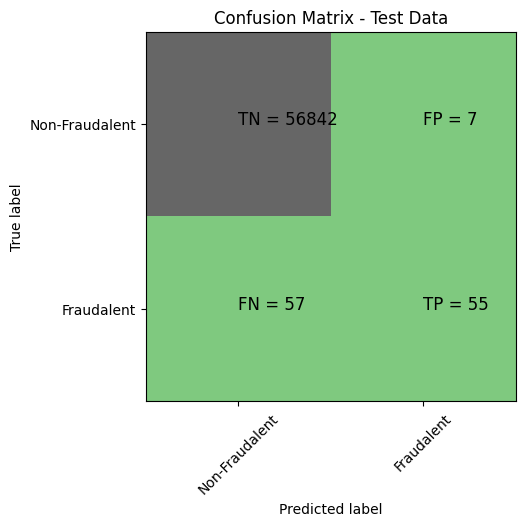

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56849
           1       0.89      0.49      0.63       112

    accuracy                           1.00     56961
   macro avg       0.94      0.75      0.82     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9685633369603184
l2 threshold: 0.0020633420555647296
ROC for the test dataset 96.9%


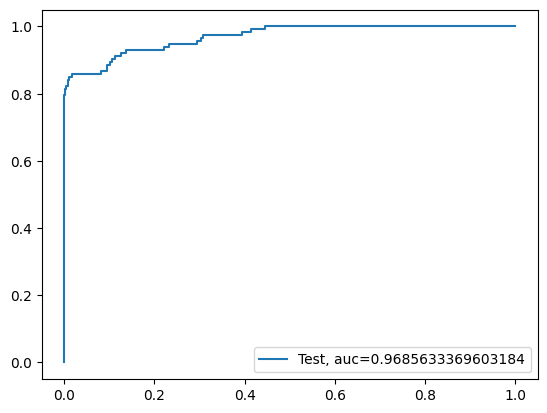

l1 roc_value: 0.8328202782810604
l1 threshold: 0.04723164115261917
ROC for the test dataset 83.3%


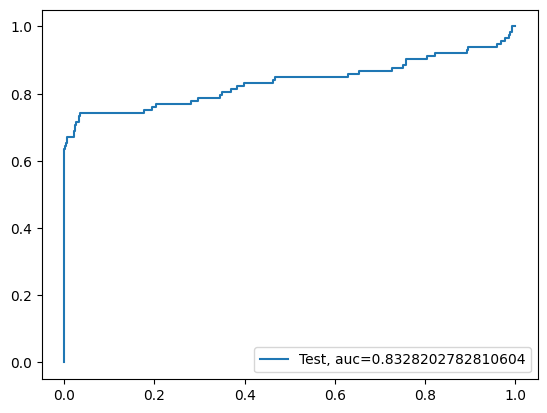

Time Taken by Model:--- 286.24403285980225 seconds---
------------------------------------------------------------


In [43]:
#Run Logistic regression with L1 and L2 Regularisation 
print("Logistic Regression with L1 And L2 Regularisation")
start_time= time.time()
df_Results = buildAndRunLogisticModels(df_Results, "Repeated KFold Cross Validation", X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model:--- %s seconds---" %(time.time()-start_time))
print('-' *60)


KNN Model
model score
0.9991573181650603
Confusion Matrix


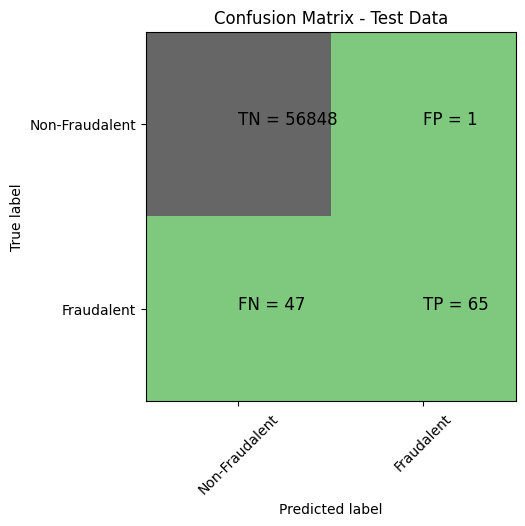

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56849
           1       0.98      0.58      0.73       112

    accuracy                           1.00     56961
   macro avg       0.99      0.79      0.86     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8480177280414531
KNN threshold: 0.2
ROC for the test dataset 84.8%


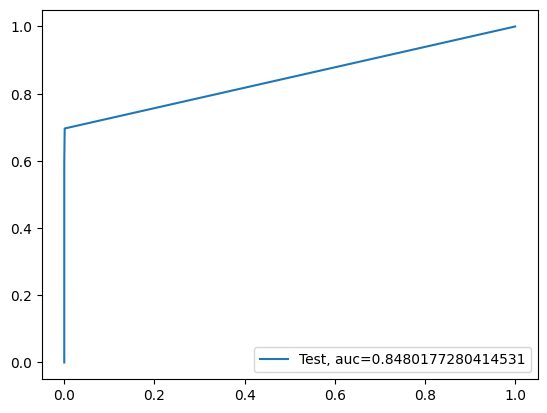

Time Taken by Model:--- 103.68285799026489 seconds---
------------------------------------------------------------


In [44]:
#Run KNN Model
print("KNN Model")
start_time=time.time()
df_Results = buildAndRunKNNModels(df_Results, "RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model:--- %s seconds---" %(time.time()-start_time))
print('-' *60) 


Decision Tree Models with'gini' & 'entropy' criteria
gini score: 0.9991222064219378
Confusion Matrix


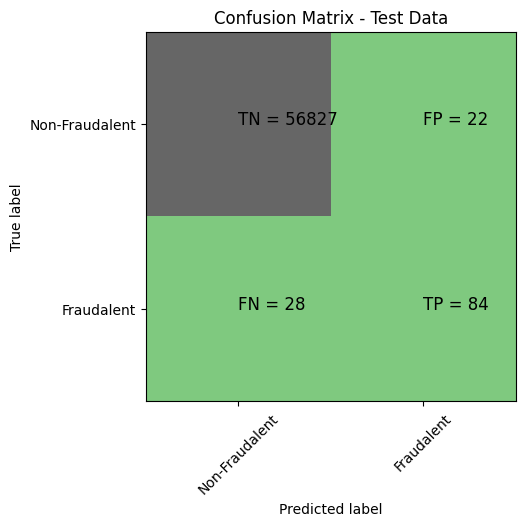

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56849
           1       0.79      0.75      0.77       112

    accuracy                           1.00     56961
   macro avg       0.90      0.87      0.89     56961
weighted avg       1.00      1.00      1.00     56961

ginitree_roc_value: 0.8748065049517142
Tree threshold: 1.0
ROC for the test dataset 87.5%


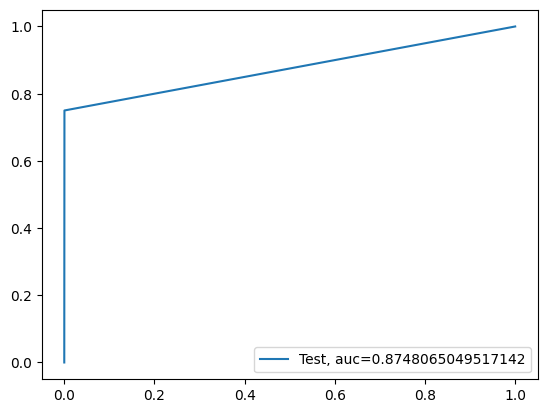

entropy score: 0.9991397622934991
Confusion Matrix


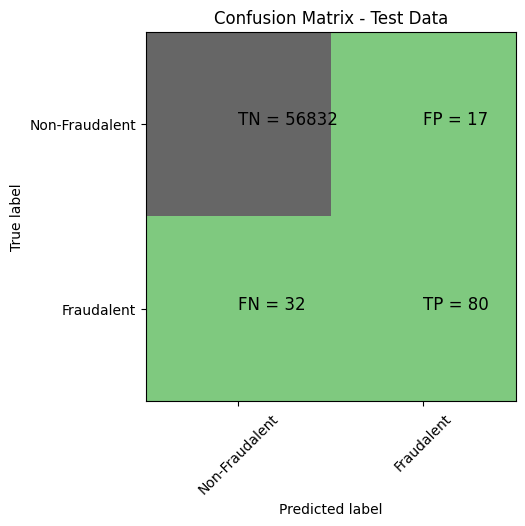

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56849
           1       0.82      0.71      0.77       112

    accuracy                           1.00     56961
   macro avg       0.91      0.86      0.88     56961
weighted avg       1.00      1.00      1.00     56961

entropytree_roc_value: 0.856993338241909
Tree threshold: 1.0
ROC for the test dataset 85.7%


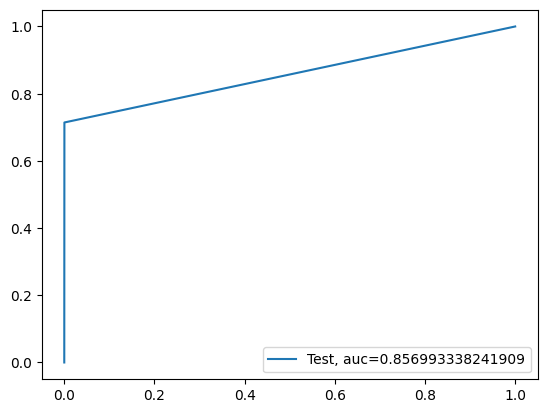

Time Taken by Model: --- 35.6583468914032 seconds---
------------------------------------------------------------


In [45]:
#Run Decision Tree Models with 'gini' & 'entropy' criteria
print("Decision Tree Models with'gini' & 'entropy' criteria")
start_time=time.time()
df_Results = buildAndRunTreeModels(df_Results, "Repeated K Fold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds---" %(time.time() - start_time))
print('-' *60)

Random Forest Model
Model Accuracy: 0.9993679886237953
Confusion Matrix


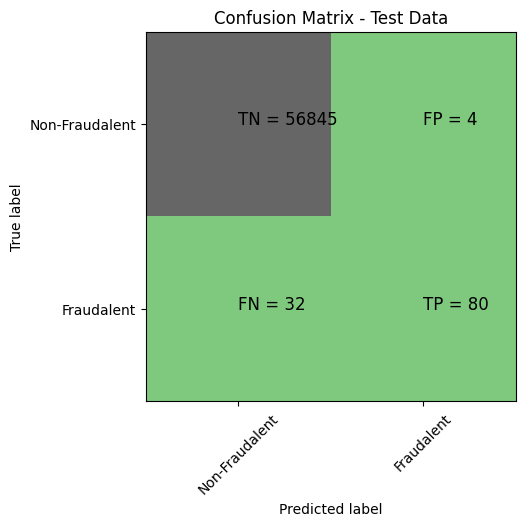

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56849
           1       0.95      0.71      0.82       112

    accuracy                           1.00     56961
   macro avg       0.98      0.86      0.91     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9221120392870336
Random Forest threshold: 0.01
ROC for the test dataset 92.2%


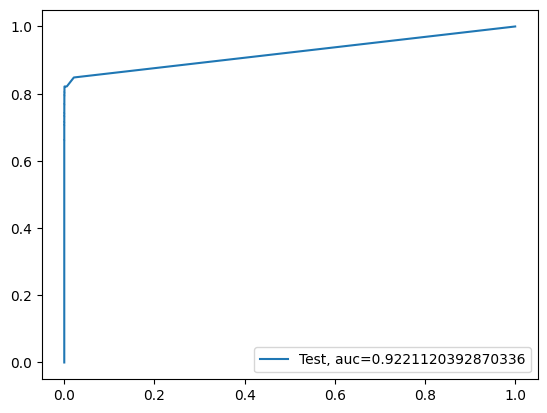

Time Taken by Model:--- 353.36076283454895 seconds ---
------------------------------------------------------------


In [46]:
#Run Random Forest Model
print("Random Forest Model")
start_time=time.time()
df_Results = buildAndRunRandomForestModels(df_Results, "Repeated K Fold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model:--- %s seconds ---" % (time.time()- start_time))
print('-' *60)

XGBoost Model
Model Accuracy: 0.9994382121100402
Confusion Matrix


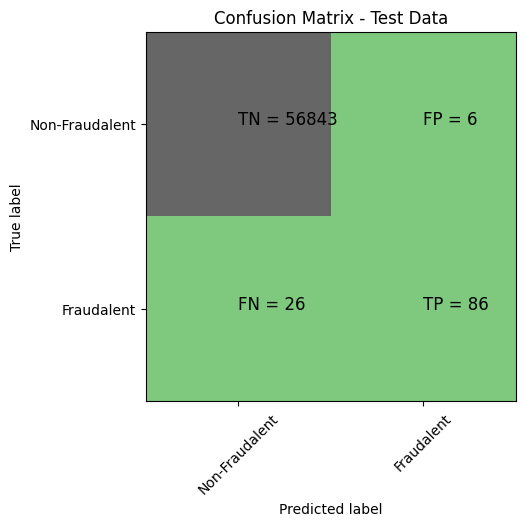

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56849
           1       0.93      0.77      0.84       112

    accuracy                           1.00     56961
   macro avg       0.97      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9627391674184493
XGBoost threshold: 5.992928709019907e-05
ROC for the test dataset 96.3%


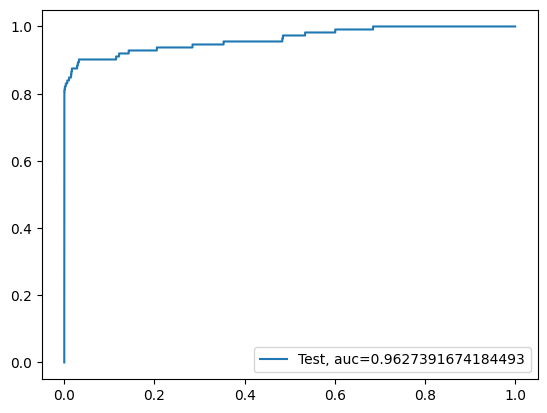

Time Taken by Model:--- 29.80745267868042 seconds ---
------------------------------------------------------------


In [47]:
#XGBoost Model
print("XGBoost Model")
start_time=time.time()
df_Results = buildAndRunXGBoostModels(df_Results, "Repeated K Fold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model:--- %s seconds ---" % (time.time()- start_time))
print('-' *60)



SVM Model with sigmoid kernel
Model Accuracy: 0.9993679886237953
Confusion Matrix


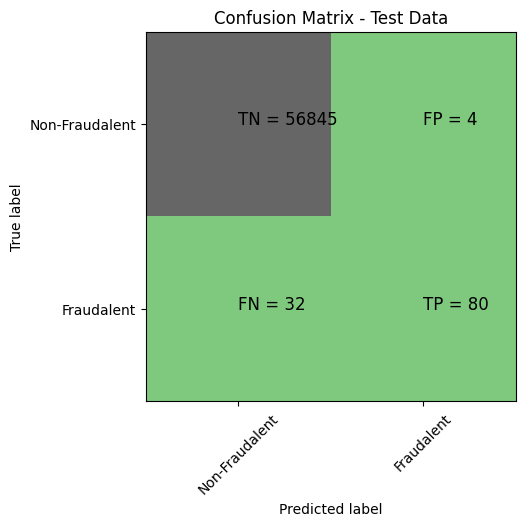

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56849
           1       0.95      0.71      0.82       112

    accuracy                           1.00     56961
   macro avg       0.98      0.86      0.91     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9221120392870336
Random Forest threshold: 0.01
ROC for the test dataset 92.2%


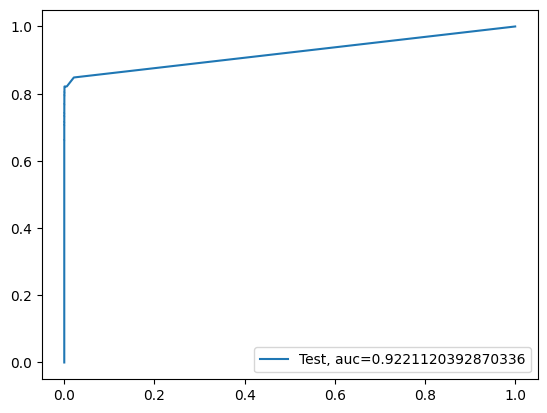

Time Taken by Model:--- 292.10425209999084 seconds ---
------------------------------------------------------------


In [48]:
#Run SVM Model
print("SVM Model with sigmoid kernel")
start_time= time.time()
df_Results = buildAndRunRandomForestModels(df_Results, "Repeated K Fold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model:--- %s seconds ---" % (time.time()- start_time))
print('-' *60)



In [50]:
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,Repeated KFold Cross Validation,Logistic Regression with L2 Regularisation,0.998841,0.968563,0.002063
1,Repeated KFold Cross Validation,Logistic Regression with L1 Regularisation,0.998876,0.832820,0.047232
2,RepeatedKFold Cross Validation,KNN,0.999157,0.848018,0.200000
3,Repeated K Fold Cross Validation,Tree Model with gini criteria,0.999122,0.874807,1.000000
4,Repeated K Fold Cross Validation,Tree Model with entropy criteria,0.999140,0.856993,1.000000
5,Repeated K Fold Cross Validation,Random Forest,0.999368,0.922112,0.010000
6,Repeated K Fold Cross Validation,XGBoost,0.999438,0.962739,0.000060
7,Repeated K Fold Cross Validation,Random Forest,0.999368,0.922112,0.010000


## Perform cross validation with Stratified KFold


In [51]:
#Lets perfrom RepeatedKFold and check the results 
from sklearn.model_selection import StratifiedKFold
skf= StratifiedKFold(n_splits=5, random_state=None)

#X is the feature set and y is the target
for train_index, test_index in skf.split(X,y):
    print("TRAIN: ", train_index, "TEST: ", test_index)
    X_train_SKF_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKF_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN:  [ 30473  30496  31002 ... 284804 284805 284806] TEST:  [    0     1     2 ... 57017 57018 57019]
TRAIN:  [     0      1      2 ... 284804 284805 284806] TEST:  [ 30473  30496  31002 ... 113964 113965 113966]
TRAIN:  [     0      1      2 ... 284804 284805 284806] TEST:  [ 81609  82400  83053 ... 170946 170947 170948]
TRAIN:  [     0      1      2 ... 284804 284805 284806] TEST:  [150654 150660 150661 ... 227866 227867 227868]
TRAIN:  [     0      1      2 ... 227866 227867 227868] TEST:  [212516 212644 213092 ... 284804 284805 284806]


Logistic Regression with L1 And L2 Regularisation
Parameters for l1 regularisations
[[-0.03660539 -0.1358827  -0.20474594  0.04333662 -0.24034598  0.08416903
   0.12654905 -0.04815306 -0.14258132 -0.1384162  -0.11668372  0.05505155
  -0.15637116 -0.24216184 -0.03137093 -0.09904364 -0.23133976  0.05582481
   0.02122044  0.20503748  0.09013502  0.00148754 -0.03796378 -0.00392139
  -0.14797782 -0.00701001 -0.06594801 -0.00660368 -0.00656465 -0.12981985]]
[-2.0409044]
{1: array([[0.5       , 0.5       , 0.5       , 0.5       , 0.48341269,
        0.44979055, 0.48500892, 0.78098262, 0.9497821 , 0.94525947,
        0.91827811, 0.91446679, 0.94989144, 0.94933682, 0.94178407,
        0.94900653, 0.92481293, 0.94421561, 0.9164553 , 0.97793244],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.54612019,
        0.57709187, 0.60597219, 0.84651057, 0.93343227, 0.93465714,
        0.92629828, 0.92557122, 0.94481541, 0.93298593, 0.95187361,
        0.93810717, 0.92664917, 0.94492021, 0.9250

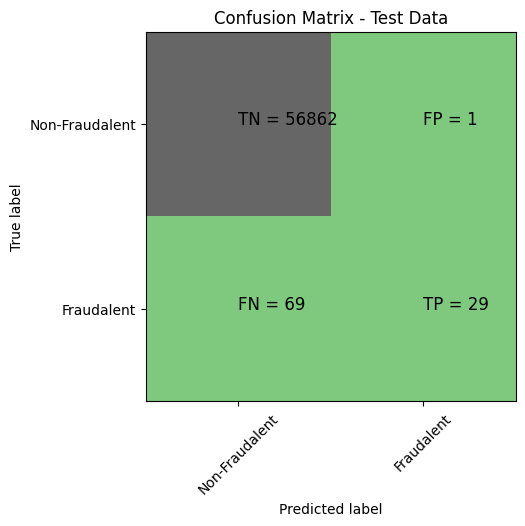

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.30      0.45        98

    accuracy                           1.00     56961
   macro avg       0.98      0.65      0.73     56961
weighted avg       1.00      1.00      1.00     56961

Accuarcy of Logistic model with l1 regularisation: 0.9987535331191517
Confusion Matrix


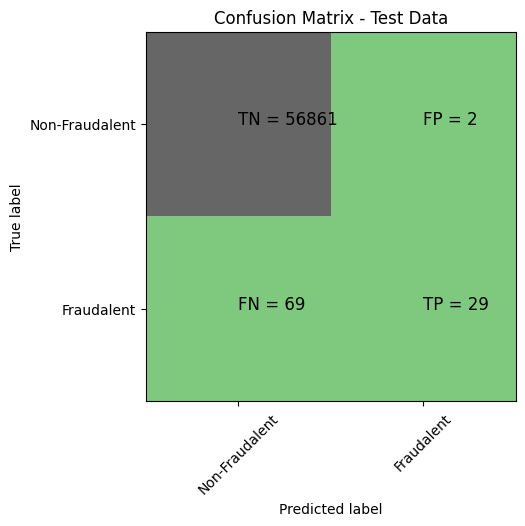

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.94      0.30      0.45        98

    accuracy                           1.00     56961
   macro avg       0.97      0.65      0.72     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.983296408446079
l2 threshold: 0.0015774700510293336
ROC for the test dataset 98.3%


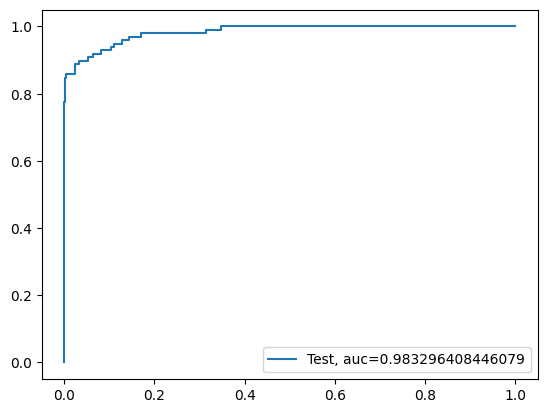

l1 roc_value: 0.8890758561483437
l1 threshold: 0.021087492766199856
ROC for the test dataset 88.9%


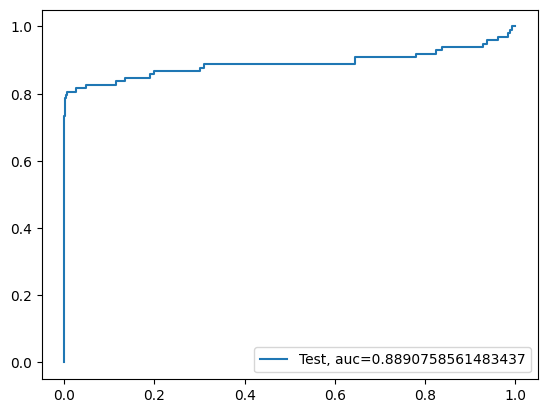

Time Taken by Model:--- 556.670147895813 seconds---
------------------------------------------------------------
KNN Model
model score
0.9991924299081828
Confusion Matrix


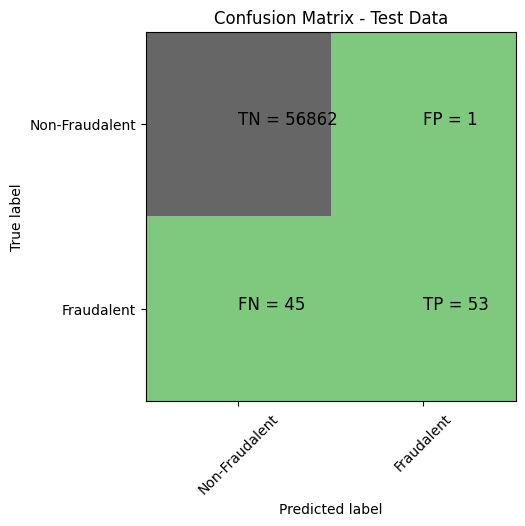

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.98      0.54      0.70        98

    accuracy                           1.00     56961
   macro avg       0.99      0.77      0.85     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8057457828285457
KNN threshold: 0.2
ROC for the test dataset 80.6%


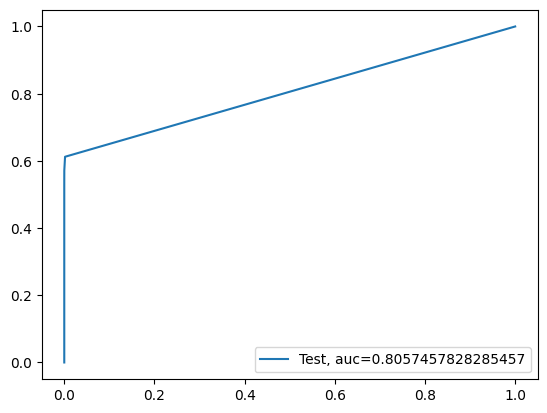

Time Taken by Model:--- 117.13354468345642 seconds---
------------------------------------------------------------
Decision Tree Models with'gini' & 'entropy' criteria
gini score: 0.998841312476958
Confusion Matrix


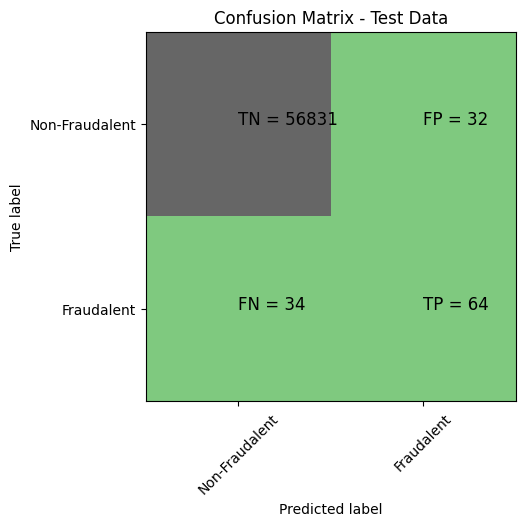

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.67      0.65      0.66        98

    accuracy                           1.00     56961
   macro avg       0.83      0.83      0.83     56961
weighted avg       1.00      1.00      1.00     56961

ginitree_roc_value: 0.8262492341959029
Tree threshold: 1.0
ROC for the test dataset 82.6%


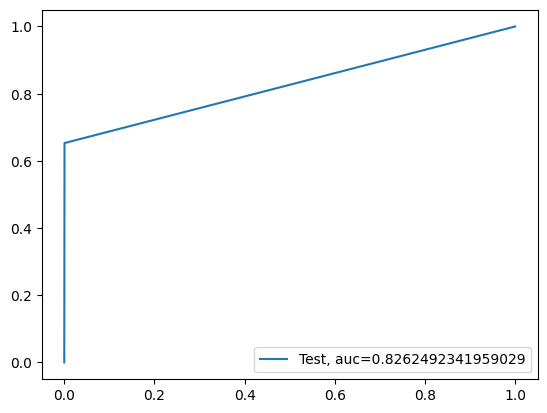

entropy score: 0.9990168711925703
Confusion Matrix


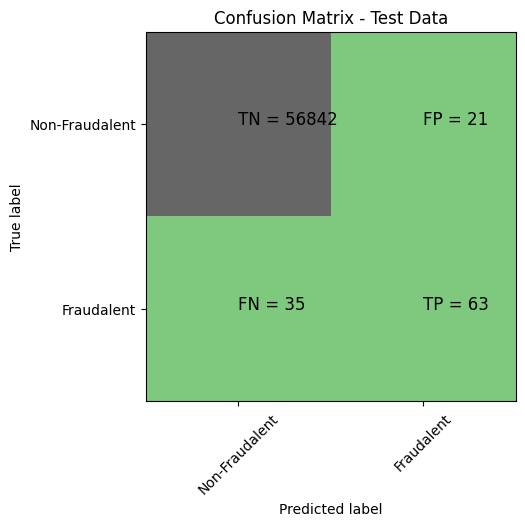

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.75      0.64      0.69        98

    accuracy                           1.00     56961
   macro avg       0.87      0.82      0.85     56961
weighted avg       1.00      1.00      1.00     56961

entropytree_roc_value: 0.8212439170839185
Tree threshold: 1.0
ROC for the test dataset 82.1%


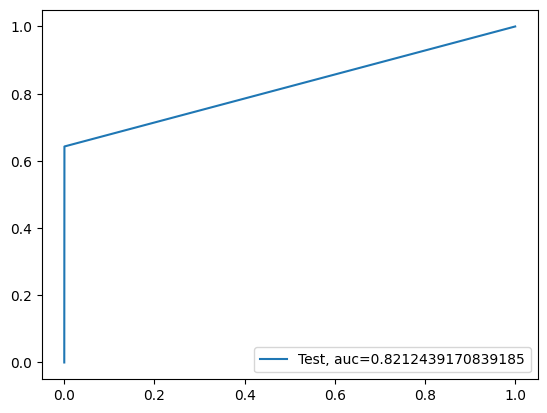

Time Taken by Model: --- 55.33114004135132 seconds---
------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9994382121100402
Confusion Matrix


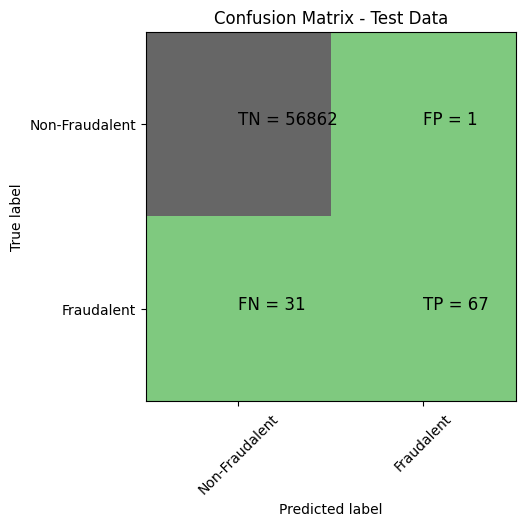

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.68      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.84      0.90     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9464721329855826
Random Forest threshold: 0.01
ROC for the test dataset 94.6%


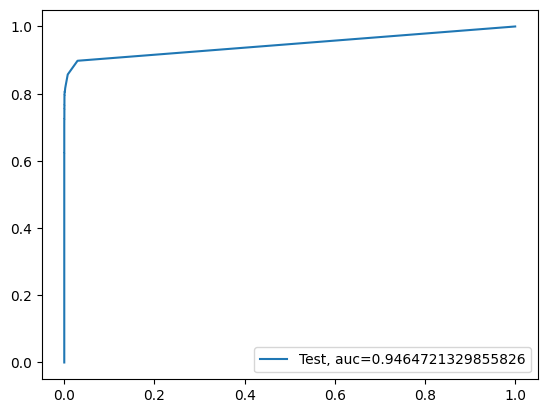

Time Taken by Model:--- 489.8104364871979 seconds ---
------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994382121100402
Confusion Matrix


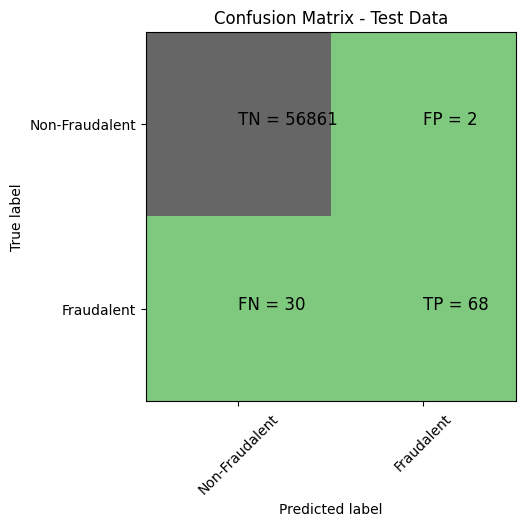

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.69      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.85      0.90     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9728125638170081
XGBoost threshold: 0.00010038274194812402
ROC for the test dataset 97.3%


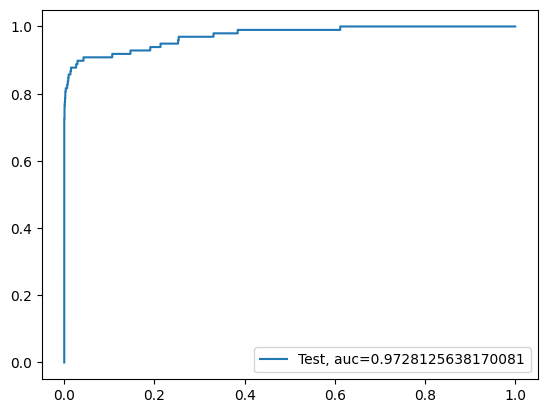

Time Taken by Model:--- 37.23096489906311 seconds ---
------------------------------------------------------------
SVM Model with sigmoid kernel
Model Accuracy: 0.9994382121100402
Confusion Matrix


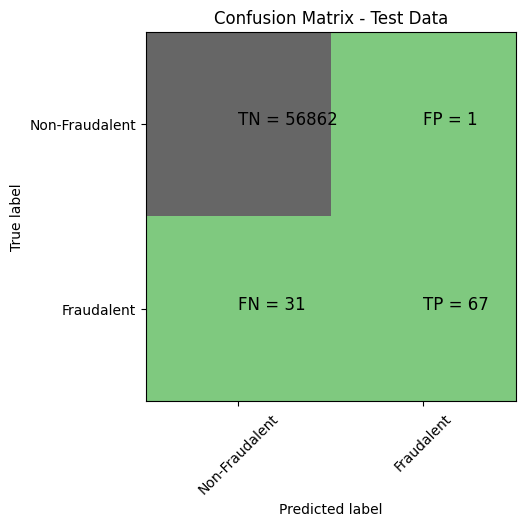

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.68      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.84      0.90     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9464721329855826
Random Forest threshold: 0.01
ROC for the test dataset 94.6%


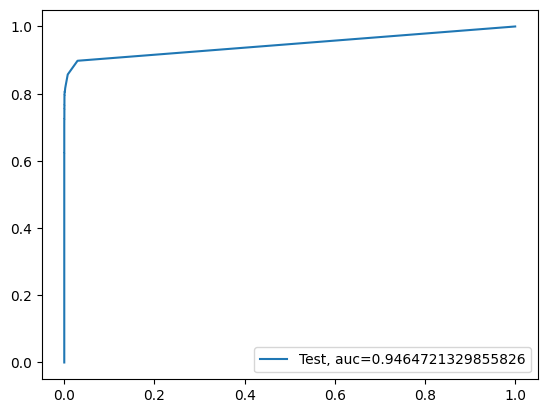

Time Taken by Model:--- 497.14804244041443 seconds ---
------------------------------------------------------------


In [57]:
#Run Logistic regression with L1 and L2 Regularisation 
print("Logistic Regression with L1 And L2 Regularisation")
start_time= time.time()
df_Results = buildAndRunLogisticModels(df_Results, "StratifiedKFold Cross Validation", X_train_SKF_cv,y_train_SKF_cv, X_test_cv, y_test_cv)
print("Time Taken by Model:--- %s seconds---" %(time.time()-start_time))
print('-' *60)

#Run KNN Model
print("KNN Model")
start_time=time.time()
df_Results = buildAndRunKNNModels(df_Results, "StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_cv, y_test_cv)
print("Time Taken by Model:--- %s seconds---" %(time.time()-start_time))
print('-' *60) 

#Run Decision Tree Models with 'gini' & 'entropy' criteria
print("Decision Tree Models with'gini' & 'entropy' criteria")
start_time=time.time()
df_Results = buildAndRunTreeModels(df_Results, "Stratified KFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds---" %(time.time() - start_time))
print('-' *60)

#Run Random Forest Model
print("Random Forest Model")
start_time=time.time()
df_Results = buildAndRunRandomForestModels(df_Results, "Stratified K Fold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_cv, y_test_cv)
print("Time Taken by Model:--- %s seconds ---" % (time.time()- start_time))
print('-' *60)

#XGBoost Model
print("XGBoost Model")
start_time=time.time()
df_Results = buildAndRunXGBoostModels(df_Results, "Stratified K Fold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_cv, y_test_cv)
print("Time Taken by Model:--- %s seconds ---" % (time.time()- start_time))
print('-' *60)

#Run SVM Model
print("SVM Model with sigmoid kernel")
start_time= time.time()
df_Results = buildAndRunRandomForestModels(df_Results, "Stratified K Fold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_cv, y_test_cv)
print("Time Taken by Model:--- %s seconds ---" % (time.time()- start_time))
print('-' *60)


In [59]:
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,Repeated KFold Cross Validation,Logistic Regression with L2 Regularisation,0.998841,0.968563,0.002063
1,Repeated KFold Cross Validation,Logistic Regression with L1 Regularisation,0.998876,0.832820,0.047232
2,RepeatedKFold Cross Validation,KNN,0.999157,0.848018,0.200000
3,Repeated K Fold Cross Validation,Tree Model with gini criteria,0.999122,0.874807,1.000000
4,Repeated K Fold Cross Validation,Tree Model with entropy criteria,0.999140,0.856993,1.000000
5,Repeated K Fold Cross Validation,Random Forest,0.999368,0.922112,0.010000
6,Repeated K Fold Cross Validation,XGBoost,0.999438,0.962739,0.000060
7,Repeated K Fold Cross Validation,Random Forest,0.999368,0.922112,0.010000
8,Repeated KFold Cross Validation,Logistic Regression with L2 Regularisation,0.998771,0.983296,0.001577
9,Repeated KFold Cross Validation,Logistic Regression with L1 Regularisation,0.998754,0.889076,0.021087


### Results for cross validation with StratifiedKFOLD:

Looking at the ROC value we have Logistic Regression with L2 Regularisation has provided best results for cross validation with StratifiedKFold technique

# Conclusion:

* As the results show Logistic Regression with L2 Regularisation for StratifiedKFold cross validation provided best results.

### Proceeding with the best scoring model:

In [60]:
# Logistic Regression
from sklearn import linear_model 
#import the package 
from sklearn.model_selection import KFold

num_C = list(np.power(10.0, np.arange(-10, 10)))
cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

clf = linear_model.LogisticRegressionCV(
        Cs= num_C
        ,penalty='l2'
        ,scoring='roc_auc'
        ,cv=cv_num
        ,random_state=42
        ,max_iter=10000
        ,fit_intercept=True
        ,solver='newton-cg'
        ,tol=10
    )
clf.fit(X_train_SKF_cv, y_train_SKF_cv)
print ('Max auc_roc for l2:', clf.scores_[1].mean(axis=0).max())

print("Parameters for l2 regularisations")
print(clf.coef_)
print(clf.intercept_)
print(clf.scores_)


#find predicted vallues 
y_pred_l2 = clf.predict(X_test)

#Find predicted probabilities
y_pred_probs_l2 = clf.predict_proba(X_test)[:,1]

# Accuaracy of L2/L1 models
Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)


print("Accuarcy of Logistic model with l2 regularisation: {0}".format(Accuracy_l2))

from sklearn.metrics import roc_auc_score
l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
print("l2 roc_value: {0}".format(l2_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
threshold = thresholds[np.argmax (tpr-fpr)]
print("l2 threshold: {0}".format(threshold))

Max auc_roc for l2: 0.9824023308855466
Parameters for l2 regularisations
[[ 0.00678282  0.06192574 -0.06721664  0.21893377  0.05414223 -0.03200935
  -0.02288975 -0.11500314 -0.06936672 -0.16377273  0.12806815 -0.19229647
  -0.03688342 -0.36077183  0.00341511 -0.08790934 -0.07254488 -0.00064562
   0.0038936  -0.02829809  0.03816122  0.02343694 -0.01158878 -0.00998664
  -0.00654257  0.00632783 -0.01008909 -0.00165992  0.00040105  0.00105388]]
[-7.43978692]
{1: array([[0.69243733, 0.69420039, 0.71446882, 0.83768575, 0.95579612,
        0.97136042, 0.98915673, 0.99473675, 0.99128052, 0.99118019,
        0.99118019, 0.99118019, 0.99118019, 0.99118019, 0.99118019,
        0.99118019, 0.99118019, 0.99118019, 0.99118019, 0.99118019],
       [0.60697342, 0.60862779, 0.62911089, 0.76880768, 0.90899104,
        0.94877822, 0.96037377, 0.98264598, 0.98535772, 0.98263569,
        0.98263569, 0.97925677, 0.97925677, 0.97925677, 0.97925677,
        0.97925677, 0.97925677, 0.97925677, 0.97925677, 0.97

# Understanding the Coefficients for respective feature

In [62]:
#Creating a dataframe with coefficient values
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(clf.coef_))],axis=1)
coefficients.columns = ['Feature','Importance Coefficient']

In [63]:
coefficients

,Feature,Importance Coefficient
0,V1,0.006783
1,V2,0.061926
2,V3,-0.067217
3,V4,0.218934
4,V5,0.054142
5,V6,-0.032009
6,V7,-0.022890
7,V8,-0.115003
8,V9,-0.069367
9,V10,-0.163773


## Print the important features of the best model to understand the dataset
* Help us understand dataset

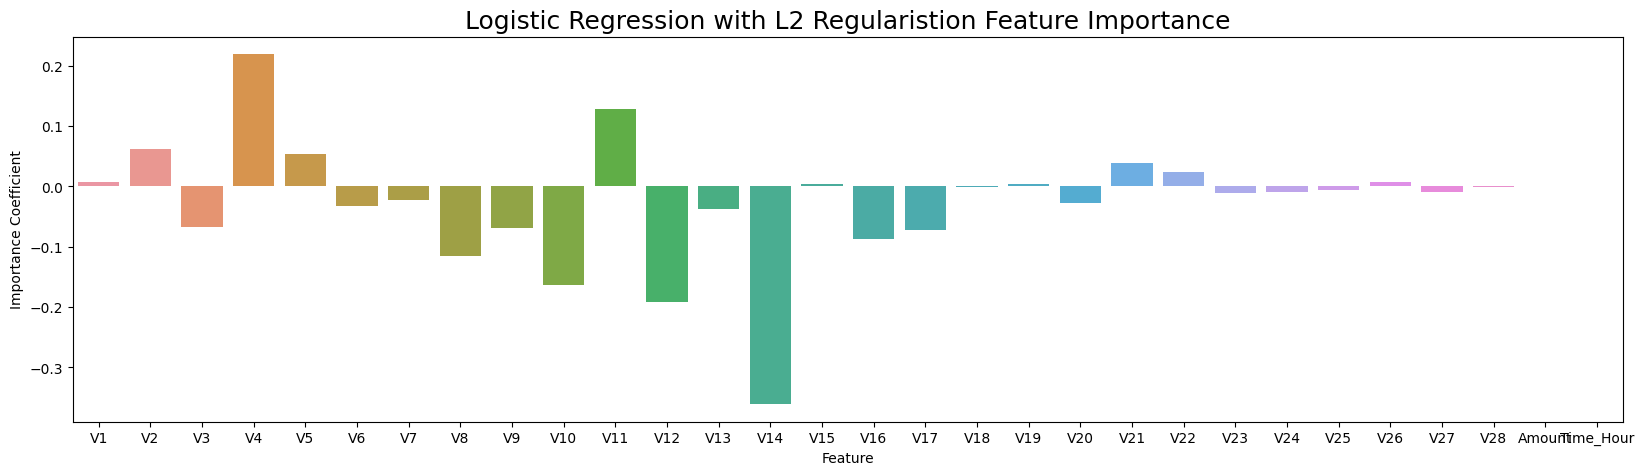

In [64]:
#Plotting the coefficient Values
plt.figure(figsize=(20,5))
sns.barplot(x="Feature",y="Importance Coefficient",data=coefficients)
plt.title("Logistic Regression with L2 Regularistion Feature Importance",fontsize=18)

plt.show()